In [1]:
from pes_bs_utils import parse_energy_cc, parse_energy_hf
import numpy as np
import matplotlib.pyplot as plt
import bokeh
import pandas as pd
import os, shutil

In [2]:
atoms_path="/home/giorgiod/MRCC_interface/Atoms/"
basisSets=['sto-3G', 'sto-6G','3-21G','6-31G*','def2-TZVP','def2-QZVPP','cc-pvtz','aug-cc-pVQZ']
atoms="H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al"
atoms=atoms.split(',')
for at in atoms:
    exec("%s=\'%s\'"%(at,at))
atoms_mol={'HAl':['H','Al'],'HeMg':['He','Mg'],'LiNa':['Li','Na'],\
           'BeNe':['Be','Ne'],'BF':['B','F'],'CO':['C','O'],'NN':['N','N']}

In [3]:
def energy(bs,targ,ref,hf=False):
    logfile=atoms_path+'{}/{}/{}_at_{}/run.log'.format(bs,targ,targ,ref)
    if hf:
            return parse_energy_hf(logfile)
    return parse_energy_cc(logfile)

In [4]:
for bs in basisSets:
    print (energy(bs,H,He,hf=True))
    print (energy(bs,H,H))

-0.2599925677713887
-0.466581837781
-0.2618680691506362
-0.471039054178
-0.4567977814511151
-0.496198634648
-0.4794638774904409
-0.498232908461
-0.4899908143421733
-0.499809832232
-0.4984534747003805
-0.499983297789
-0.4941593811701392
-0.499809811302
-0.4998447757855282
-0.499948321469


In [5]:
data_sto3G=pd.read_pickle('./data_sto3G')
data_sto6G=pd.read_pickle('./data_sto6G')
data_321G=pd.read_pickle('./data_321G')
data_631G=pd.read_pickle('./data_631G')
data_ccpvtz=pd.read_pickle('./data_ccpvtz')
data_aug=pd.read_pickle('./data_aug')
data_def2_tzvp=pd.read_pickle('./data_def2_tzvp')
data_def2_qzvpp=pd.read_pickle('data_def2_qzvpp_bs_error')
#data_def2_qzvpp=pd.read_pickle('./data_def2_qzvpp')

In [16]:
data_def2_qzvpp.rename(columns={'abs_err':'tot_err'})
data_def2_qzvpp['tot_err']=data_def2_qzvpp.e_alch-data_def2_qzvpp.e_ccsd


In [7]:
def bsc(ref,target):
    return \
    energy('def2-QZVPP',atoms_mol[target][0],atoms_mol[ref][0])\
    +energy('def2-QZVPP',atoms_mol[target][1],atoms_mol[ref][1]) \
    -energy('def2-QZVPP',atoms_mol[target][0],atoms_mol[target][0])\
    -energy('def2-QZVPP',atoms_mol[target][1],atoms_mol[target][1])

In [80]:
bs_corr=[]
for i in range(4200):
    bs_corr.append(\
energy('def2-QZVPP',atoms_mol[data_def2_qzvpp.target[i]][0],atoms_mol[data_def2_qzvpp.ref[i]][0])\
+energy('def2-QZVPP',atoms_mol[data_def2_qzvpp.target[i]][1],atoms_mol[data_def2_qzvpp.ref[i]][1])\
-energy('def2-QZVPP',atoms_mol[data_def2_qzvpp.target[i]][0],atoms_mol[data_def2_qzvpp.target[i]][0])\
-energy('def2-QZVPP',atoms_mol[data_def2_qzvpp.target[i]][1],atoms_mol[data_def2_qzvpp.target[i]][1]))

data_def2_qzvpp['bs_corr']=np.asarray(bs_corr)
data_def2_qzvpp.to_pickle('data_def2_qzvpp_bs_error')

In [81]:
pd.set_option('display.max_rows', 500)
data_def2_qzvpp[data_def2_qzvpp.ref=='BeNe'][data_def2_qzvpp.target=='HeMg'][data_def2_qzvpp.alchemy==4]

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,err_basis,bs_corr,bs_corr_rhf,corr_ccsd_pyscf,tot_err
1904,4,1.3,def2-QZVPP,-201.001716,-200.942816,BeNe,HeMg,0.058900,6.096072,-200.996757,-0.004959,-0.053941,0.369831,0.709599,0.560846,-0.058900
1909,4,1.4,def2-QZVPP,-201.204729,-201.283386,BeNe,HeMg,0.078657,6.148319,-201.330587,0.125857,-0.047201,0.369831,0.709599,0.560846,0.078657
1914,4,1.5,def2-QZVPP,-201.316099,-201.551066,BeNe,HeMg,0.234967,6.204662,-201.591874,0.275775,-0.040808,0.369831,0.709599,0.560846,0.234967
1919,4,1.6,def2-QZVPP,-201.423682,-201.760588,BeNe,HeMg,0.336906,6.271851,-201.795760,0.372078,-0.035172,0.369831,0.709599,0.560846,0.336906
1924,4,1.7,def2-QZVPP,-201.572251,-201.924254,BeNe,HeMg,0.352002,6.329779,-201.954714,0.382462,-0.030460,0.369831,0.709599,0.560846,0.352002
1929,4,1.8,def2-QZVPP,-201.753137,-202.051984,BeNe,HeMg,0.298847,6.383154,-202.078648,0.325511,-0.026664,0.369831,0.709599,0.560846,0.298847
1934,4,1.9,def2-QZVPP,-201.937169,-202.151640,BeNe,HeMg,0.214471,6.450130,-202.175310,0.238141,-0.023670,0.369831,0.709599,0.560846,0.214471
1939,4,2.0,def2-QZVPP,-202.101578,-202.229401,BeNe,HeMg,0.127822,6.502722,-202.250725,0.149147,-0.021325,0.369831,0.709599,0.560846,0.127822
1944,4,2.1,def2-QZVPP,-202.236951,-202.290109,BeNe,HeMg,0.053158,6.567479,-202.309582,0.072631,-0.019474,0.369831,0.709599,0.560846,0.053158
1949,4,2.2,def2-QZVPP,-202.343390,-202.337564,BeNe,HeMg,0.005826,6.619111,-202.355540,0.012150,-0.017976,0.369831,0.709599,0.560846,-0.005826


In [83]:
energy('def2-QZVPP','He','Be',hf=True)+energy('def2-QZVPP','Mg','Ne',hf=True)

-201.84881147667403

In [84]:
bsc('BeNe','HeMg')

0.3698313851180046

In [49]:
from bokeh.io import output_notebook, show 
from bokeh.plotting import figure
import ipyvolume.bokeh
from bokeh.models import HoverTool,ColumnDataSource

In [79]:
p = figure(plot_width=1800, plot_height=1000)

source = ColumnDataSource(data_def2_qzvpp[data_def2_qzvpp.alchemy==4][data_def2_qzvpp.distance==3.2])
p.scatter('err_basis', 'bs_corr', source=source)
p.line(np.linspace(-1,16,10),np.linspace(-1,16,10),color='black')
hover = HoverTool()
hover.tooltips = [("Reference","@ref"), ("Target", "@target"),("Distance",'@distance'),\
                  ('err_basis','@err_basis'),('bs_corr','@bs_corr')]
hover.mode = 'mouse'
p.add_tools(hover)
p.xaxis.axis_label = 'err_basis'
p.yaxis.axis_label = 'bs_corr'
show(p)


/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


(0, 1)

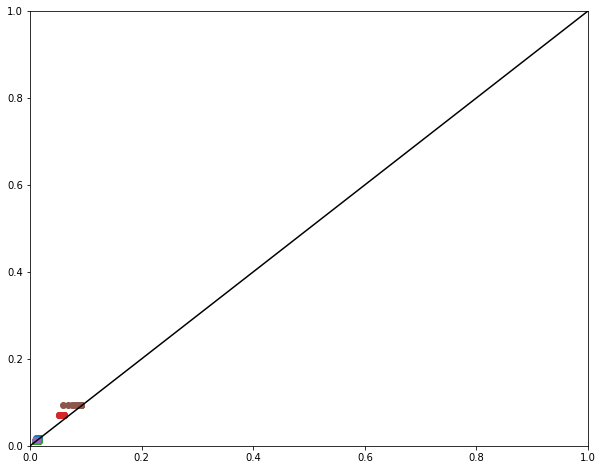

In [108]:
good_mol=['CO','BF','NN']#,'BeNe']
plt.figure(figsize=(10,8))
for ref in good_mol:
    for target in good_mol:
        if target==ref:continue
        plt.scatter(data_def2_qzvpp[data_def2_qzvpp.alchemy==4][data_def2_qzvpp.ref==ref][data_def2_qzvpp.target==target].err_basis,\
         data_def2_qzvpp[data_def2_qzvpp.alchemy==4][data_def2_qzvpp.ref==ref][data_def2_qzvpp.target==target].bs_corr)
plt.plot(np.linspace(-1,15,10),np.linspace(-1,15,10),color='black')
#plt.ax.ax_label
#plt.title()
plt.xlim(0,1)
plt.ylim(0,1)
#plt.xscale('log')
#plt.yscale('log')

In [14]:
import pyscf
from pyscf.gto import M
from pyscf.scf import RHF
import pyscf.qmmm
from pyscf.cc import ccsd

In [15]:
#single atom qmmmm
def saqmmm(mol,dh):
    mf = pyscf.qmmm.mm_charge(pyscf.scf.RHF(mol), mol.atom_coords(), np.asarray([dh]),unit='bohr')
    class NoSelfQMMM(mf.__class__):
        def energy_nuc(self):
            e_nuc=0
            return e_nuc
    mf = NoSelfQMMM()
    return mf

In [16]:
C=M(atom='C 0 0 0',basis='def2-TZVP',charge=-1,spin=1)
O=M(atom='O 0 0 0',basis='def2-TZVP',charge=1,spin=1)
N=M(atom='N 0 0 0',basis='def2-TZVP',spin=1)
nhf=pyscf.scf.UHF(N)
nchf=saqmmm(C,1)
nohf=saqmmm(O,-1)
atoms.index('C')

5

In [17]:
def delta_bs(ref,targ):
    charge=atoms.index(targ)-atoms.index(ref)
    spin=(atoms.index(targ)+1)%2
    print('spin =',spin)
    T=M(atom='{} 0 0 0'.format(targ),basis='def2-QZVPP',spin=spin)
    TatR=M(atom='{} 0 0 0'.format(ref),basis='def2-QZVPP',charge=-charge,spin=spin)
    eT=RHF(T).kernel()
    eTatR=saqmmm(TatR,charge).kernel()
    return eTatR-eT

In [18]:
delta_bs('C','Be')+delta_bs('O','Ne')

spin = 0
converged SCF energy = -14.57300092616
converged SCF energy = -14.5623207148525
spin = 0
converged SCF energy = -128.546849102302
converged SCF energy = -128.450768644002


0.10676066960725095

In [19]:
"""bs_corr_rhf=[]
for i in range(0,4200,100):
    bs_corr_rhf.append(\
delta_bs(atoms_mol[data_def2_qzvpp.ref[i]][0],atoms_mol[data_def2_qzvpp.target[i]][0])\
+delta_bs(atoms_mol[data_def2_qzvpp.ref[i]][1],atoms_mol[data_def2_qzvpp.target[i]][1]))
bs_corr_rhf_n=[]
for i in range(42):
    for j in range(100):
        bs_corr_rhf_n.append(bs_corr_rhf[i])
data_def2_qzvpp['bs_corr_rhf']=np.asarray(bs_corr_rhf_n)
"""

spin = 0
converged SCF energy = -2.86162483917628
converged SCF energy = -2.84974513437124
spin = 0
converged SCF energy = -199.614487886512
converged SCF energy = -199.594668227332
spin = 1
converged SCF energy = -7.43271513295623
converged SCF energy = -7.21954220934149
spin = 1
converged SCF energy = -161.858752389958
converged SCF energy = -161.806948674565
spin = 0
converged SCF energy = -14.57300092616
converged SCF energy = -13.4301867359006
spin = 0
converged SCF energy = -128.546849102302
converged SCF energy = -128.48267346508
spin = 1
converged SCF energy = -24.5290852743884
converged SCF energy = -20.9836358669417
spin = 1
converged SCF energy = -99.4110540350996
converged SCF energy = -99.3526578991672
spin = 0
converged SCF energy = -37.6046865883458
converged SCF energy = -29.8815356706205
spin = 0
converged SCF energy = -74.6909868151316
converged SCF energy = -74.6510749249242
spin = 1
converged SCF energy = -54.2638653102401
converged SCF energy = -40.3823822093594
sp

In [71]:
p = figure(plot_width=1800, plot_height=1000)

source = ColumnDataSource(data_def2_qzvpp[data_def2_qzvpp.alchemy==4][data_def2_qzvpp.distance==3.2])
p.scatter('err_basis', 'bs_corr_rhf', source=source)
p.line(np.linspace(-1,16,10),np.linspace(-1,16,10),color='black')
hover = HoverTool()
hover.tooltips = [("Reference","@ref"), ("Target", "@target"),("Distance",'@distance'),\
                  ('err_basis','@err_basis'),('bs_corr_rhf','@bs_corr')]
hover.mode = 'mouse'
p.add_tools(hover)
p.xaxis.axis_label = 'err_basis'
p.yaxis.axis_label = 'bs_corr_rhf'
show(p)


/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
data_def2_qzvpp[94::100]

,alchemy,distance,basis_set,e_alch,e_ccsd,ref,target,abs_err,delta_rho,e_at_ref_bs,err_alch,err_basis,bs_corr,bs_corr_rhf
94,4,3.1,def2-QZVPP,-202.458037,-202.496231,HAl,HeMg,0.038194,4.172146,-202.464604,0.006567,0.031627,0.032770,0.031699
194,4,3.1,def2-QZVPP,-168.480451,-169.237979,HAl,LiNa,0.757529,6.784567,-169.018233,0.537782,0.219746,0.234548,0.264977
294,4,3.1,def2-QZVPP,-137.220977,-143.405369,HAl,BeNe,6.184392,8.846128,-141.979384,4.758407,1.425985,1.488784,1.206990
394,4,3.1,def2-QZVPP,-99.630438,-124.464163,HAl,BF,24.833726,9.734443,-120.749104,21.118667,3.715059,3.821608,3.603846
494,4,3.1,def2-QZVPP,-38.652506,-112.948241,HAl,CO,74.295735,11.256301,-105.173389,66.520883,7.774852,8.101660,7.763063
594,4,3.1,def2-QZVPP,73.129821,-109.112757,HAl,NN,182.242578,12.977154,-95.383831,168.513652,13.728927,14.249241,13.902522
694,4,3.1,def2-QZVPP,-242.272576,-242.549284,HeMg,HAl,0.276708,4.172146,-242.276965,0.004389,0.272319,0.274844,0.273880
794,4,3.1,def2-QZVPP,-169.126379,-169.237979,HeMg,LiNa,0.111601,3.966467,-169.110764,-0.015615,0.127215,0.202942,0.245621
894,4,3.1,def2-QZVPP,-142.756997,-143.405369,HeMg,BeNe,0.648372,6.827738,-142.610299,-0.146698,0.795069,0.848779,0.565118
994,4,3.1,def2-QZVPP,-124.217343,-124.464163,HeMg,BF,0.246821,8.683422,-122.858852,-1.358490,1.605311,1.760062,1.533608


In [26]:
def delta_bs_ccsd(ref,targ):
    charge=atoms.index(targ)-atoms.index(ref)
    spin=(atoms.index(targ)+1)%2
    print('spin =',spin)
    T=M(atom='{} 0 0 0'.format(targ),basis='def2-QZVPP',spin=spin)
    TatR=M(atom='{} 0 0 0'.format(ref),basis='def2-QZVPP',charge=-charge,spin=spin)
    rhfT=RHF(T)
    rhfTatR=saqmmm(TatR,charge)
    eT = rhfT.kernel()
    eTatR=rhfTatR.kernel()
    eT += ccsd.CCSD(rhfT).kernel()[0]
    eTatR += ccsd.CCSD(rhfTatR).kernel()[0]
    return eTatR-eT

In [27]:
delta_bs_ccsd('N','C')+delta_bs_ccsd('N','O')

spin = 0
converged SCF energy = -37.6046865883458
converged SCF energy = -37.6030637297498
E(CCSD) = -37.74994176764202  E_corr = -0.1452551792962224
E(CCSD) = -37.75251149906635  E_corr = -0.149447769316592
spin = 0
converged SCF energy = -74.6909868151317
converged SCF energy = -74.6811251543485
E(CCSD) = -74.92634305211992  E_corr = -0.2353562369882728
E(CCSD) = -74.91157110905257  E_corr = -0.2304459547040916


0.012202211643014493

In [28]:
"""bs_corr_ccsd=[]
for i in range(0,4200,100):
    bs_corr_ccsd.append(\
delta_bs_ccsd(atoms_mol[data_def2_qzvpp.ref[i]][0],atoms_mol[data_def2_qzvpp.target[i]][0])\
+delta_bs_ccsd(atoms_mol[data_def2_qzvpp.ref[i]][1],atoms_mol[data_def2_qzvpp.target[i]][1]))
bs_corr_ccsd_n=[]
for i in range(42):
    for j in range(100):
        bs_corr_ccsd_n.append(bs_corr_ccsd[i])
data_def2_qzvpp['corr_ccsd_pyscf']=np.asarray(bs_corr_ccsd_n)
"""

spin = 0
converged SCF energy = -2.86162483917628
converged SCF energy = -2.84974513437124
E(CCSD) = -2.902451379322165  E_corr = -0.0408265401458826
E(CCSD) = -2.889180423524663  E_corr = -0.03943528915342129
spin = 0
converged SCF energy = -199.614487886512
converged SCF energy = -199.594668227332
E(CCSD) = -199.8676499339751  E_corr = -0.253162047463543
E(CCSD) = -199.8437642610772  E_corr = -0.2490960337452163
spin = 1
converged SCF energy = -7.43271513295623
converged SCF energy = -7.21954220934149
E(CCSD) = -7.55893020612906  E_corr = -0.1262150731728325
E(CCSD) = -7.267062228386015  E_corr = -0.04752001904452138
spin = 1
converged SCF energy = -161.858752389958
converged SCF energy = -161.806948674565
E(CCSD) = -162.1303709284859  E_corr = -0.2716185385274659
E(CCSD) = -162.1128155591815  E_corr = -0.3058668846162115
spin = 0
converged SCF energy = -14.57300092616
converged SCF energy = -13.4301867359006
E(CCSD) = -14.65519784802613  E_corr = -0.0821969218661416
E(CCSD) = -13.48

E(CCSD) = -162.1303709284493  E_corr = -0.271618538490764
E(CCSD) = -161.3441674372321  E_corr = -0.3732220133792511
spin = 0
converged SCF energy = -14.57300092616
converged SCF energy = -14.5354511351263
E(CCSD) = -14.65519784802613  E_corr = -0.08219692186614194
E(CCSD) = -14.62535629164533  E_corr = -0.08990515651906736
spin = 0
converged SCF energy = -128.546849102302
converged SCF energy = -128.249586004306
E(CCSD) = -128.862003311899  E_corr = -0.3151542095969215
E(CCSD) = -128.5227020404702  E_corr = -0.2731160361639446
spin = 1
converged SCF energy = -24.5290852743884
converged SCF energy = -24.5220373882716
E(CCSD) = -24.66409123437177  E_corr = -0.1350059599833965
E(CCSD) = -24.66660129710828  E_corr = -0.1445639088367265
spin = 1
converged SCF energy = -99.4110540350996
converged SCF energy = -99.3346397579258
E(CCSD) = -99.73155555151307  E_corr = -0.3205015164135014
E(CCSD) = -99.63167834039658  E_corr = -0.2970385824708094
spin = 0
converged SCF energy = -37.604686588345

In [29]:
p = figure(plot_width=1800, plot_height=1000)

source = ColumnDataSource(data_def2_qzvpp[data_def2_qzvpp.alchemy==4][data_def2_qzvpp.distance==3.2])
p.scatter('err_basis', 'corr_ccsd_pyscf', source=source)
p.line(np.linspace(-1,16,10),np.linspace(-1,16,10),color='black')
hover = HoverTool()
hover.tooltips = [("Reference","@ref"), ("Target", "@target"),("Distance",'@distance'),\
                  ('err_basis','@err_basis'),('corr_ccsd_pyscf','@bs_corr')]
hover.mode = 'mouse'
p.add_tools(hover)
p.xaxis.axis_label = 'err_basis'
p.yaxis.axis_label = 'corr_ccsd_pyscf'
show(p)

/home/giorgiod/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
data_def2_qzvpp.to_pickle('data_def2_qzvpp_bs_error')